In [740]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [741]:
print(tf.__version__)

2.0.0


In [742]:
# load data
train = pd.read_csv("train.csv", dtype='float32')
test = pd.read_csv("test.csv", dtype='float32')
train.shape

(900, 252)

In [743]:
Xtrain = np.array(train.iloc[:,1:251])
Ytrain = np.array(train.iloc[:,251])
Xtest = np.array(test.iloc[:,1:251])
Ytest = np.array(test.iloc[:,251])

In [744]:
Xtest.shape, Ytest.shape

((102, 250), (102,))

In [745]:
Xtrain.shape, Ytrain.shape

((900, 250), (900,))

In [746]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

In [747]:
# constructing the autoencoder
# determine h through PCA on your own data

# try to find suitable initializers for your own data
h = 6
model = Sequential()
model.add(Dense(h, activation='relu', input_dim=250, bias_initializer=Constant(value=10)))
model.add(Dense(250, activation='relu', bias_initializer=Constant(value=5)))
model.summary()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 6)                 1506      
_________________________________________________________________
dense_183 (Dense)            (None, 250)               1750      
Total params: 3,256
Trainable params: 3,256
Non-trainable params: 0
_________________________________________________________________


In [748]:
from tensorflow.keras import optimizers, losses
#batch_size = 16
#decay_steps = 900/batch_size
#lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1, decay_steps=decay_steps, decay_rate=np.exp(-0.04), staircase=False)
#model.compile(optimizer = optimizers.SGD(learning_rate = lr_schedule), loss = 'mean_squared_error')

model.compile(optimizer=optimizers.SGD(learning_rate=0.05, decay=1e-7), loss='mean_squared_error')

In [749]:
from tensorflow.keras import callbacks

# the following callback to record losses after each batch
class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
#    def on_batch_end(self, batch, logs={}):
#      self.MSEtrain.append(self.model.evaluate(Xtrain,Xtrain,verbose = 0))
#      self.MSEtest.append(self.model.evaluate(Xtest,Xtest,verbose = 0))

MyMonitor = MyHistory()

# Keras built-in early-stopping callback
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000, restore_best_weights=True)

In [750]:
# For saving the best model choosen by keras.
filepath = 'BestModel.h5'
checkpointer = callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, mode='auto', save_freq='epoch')

In [751]:
#Monitor = model.fit(Xtrain, Xtrain, epochs=100, batch_size=batch_size, callbacks = [MyMonitor, es,checkpointer], validation_data = (Xtest, Xtest), verbose = 2)

Monitor = model.fit(Xtrain, Xtrain, epochs=2000, batch_size=16, callbacks = [MyMonitor, es,checkpointer], validation_data = (Xtest, Xtest), verbose = 2)
# After training, access MSE(AutoTrain) and MSE(AutoTest) through MyMonitor.MSEtrain and MyMonitor.MSEtest.

Train on 900 samples, validate on 102 samples
Epoch 1/2000
900/900 - 1s - loss: 0.9767 - val_loss: 0.0841
Epoch 2/2000
900/900 - 0s - loss: 0.0823 - val_loss: 0.0755
Epoch 3/2000
900/900 - 0s - loss: 0.0700 - val_loss: 0.0633
Epoch 4/2000
900/900 - 0s - loss: 0.0634 - val_loss: 0.0606
Epoch 5/2000
900/900 - 0s - loss: 0.0581 - val_loss: 0.0583
Epoch 6/2000
900/900 - 0s - loss: 0.0573 - val_loss: 0.0563
Epoch 7/2000
900/900 - 0s - loss: 0.0565 - val_loss: 0.0559
Epoch 8/2000
900/900 - 0s - loss: 0.0564 - val_loss: 0.0576
Epoch 9/2000
900/900 - 0s - loss: 0.0555 - val_loss: 0.0550
Epoch 10/2000
900/900 - 0s - loss: 0.0537 - val_loss: 0.0539
Epoch 11/2000
900/900 - 0s - loss: 0.0534 - val_loss: 0.0528
Epoch 12/2000
900/900 - 0s - loss: 0.0532 - val_loss: 0.0523
Epoch 13/2000
900/900 - 0s - loss: 0.0528 - val_loss: 0.0524
Epoch 14/2000
900/900 - 0s - loss: 0.0524 - val_loss: 0.0542
Epoch 15/2000
900/900 - 0s - loss: 0.0523 - val_loss: 0.0534
Epoch 16/2000
900/900 - 0s - loss: 0.0497 - val_

In [752]:
from tensorflow.keras.models import load_model
# Restore the best model and calculate confusion matrices.

bestmodel = load_model('BestModel.h5')
Xtrani_MSE = bestmodel.evaluate(Xtrain,Xtrain)
Xtest_MSE = bestmodel.evaluate(Xtest,Xtest)
print(Xtrani_MSE, Xtest_MSE)

900/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [724]:
# Plot MSE(AutoTrain) and MSE(AutoTest) versus the number of batches
MyMonitor.MSEtrain

[]

<function matplotlib.pyplot.show(*args, **kw)>

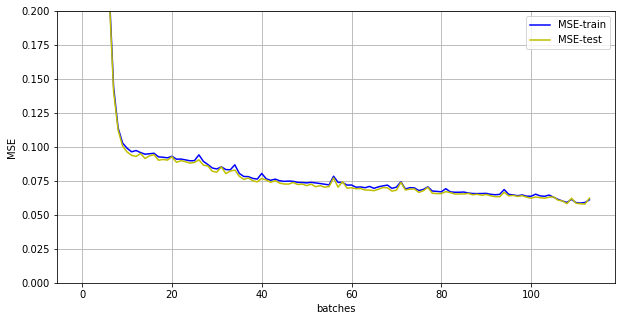

In [688]:

MSE_train = np.array(MyMonitor.MSEtrain)
MSE_test = np.array(MyMonitor.MSEtest)

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
axb=fig.add_subplot(1,1,1)
axb.grid()
axb.plot(range(len(MSE_train)),MSE_train,c='b')
axb.plot(range(len(MSE_train)),MSE_test,c='y')
axb.set_xlabel('batches')
axb.set_ylabel('MSE')
axb.set_ylim(0,0.2)
plt.legend(['MSE-train','MSE-test'],loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

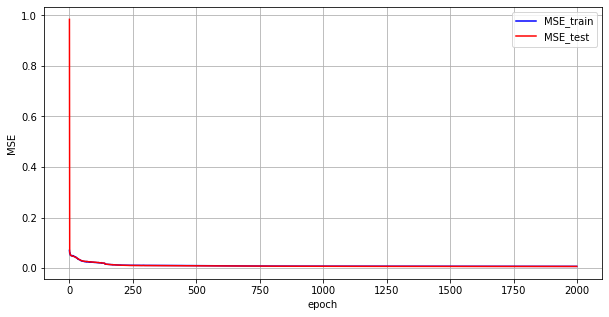

In [726]:
# plot loss and val_loss to choose the best epoch
loss_tr = Monitor.history['loss']
loss_te = Monitor.history['val_loss']

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(loss_tr)),loss_te,c='b')
ax.plot(range(len(loss_tr)),loss_tr,c='r')
ax.set_xlabel('epoch')
ax.set_ylabel('MSE')
#ax.set_ylim(0,6000)
plt.legend(['MSE_train','MSE_test'],loc='best')
plt.show

In [753]:
# Compute Compressed Inputs
Htrain = model.layers[0](Xtrain).numpy()
Htest = model.layers[0](Xtest).numpy()
#np.savetxt('Htrain.csv',Htrain)
#np.savetxt('Htest.csv',Htest)
Htrain

array([[ 8.928484 ,  7.495332 ,  8.254102 ,  8.365015 ,  8.189238 ,
         7.9194903],
       [ 8.9253   ,  7.510866 ,  8.270302 ,  8.3532295,  8.177727 ,
         7.910894 ],
       [ 8.890434 ,  7.4934645,  8.254566 ,  8.36148  ,  8.18207  ,
         7.8794985],
       ...,
       [ 7.4810877,  6.22396  , 11.456747 ,  7.353758 ,  7.9396076,
         6.901822 ],
       [ 7.565216 ,  6.1876163, 11.397464 ,  7.349606 ,  7.9630513,
         6.826151 ],
       [ 7.568344 ,  6.204731 , 11.35052  ,  7.341483 ,  7.976984 ,
         6.839082 ]], dtype=float32)

In [754]:
Ytrain = np.reshape(Ytrain,(900,1))
Ytest = np.reshape(Ytest,(102,1))
#np.savetxt('Ytrain.csv',Ytrain)
#np.savetxt('Ytest.csv',Ytest)


In [755]:
k = 60  # ration = 900*1 / number of weight >=1 --> k < = 112
mlp = Sequential()
mlp.add(Dense(k, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 60)                420       
_________________________________________________________________
dense_185 (Dense)            (None, 1)                 61        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [756]:
#batch_size = 16
#decay_steps = 900/batch_size
#lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.1, decay_steps=decay_steps, decay_rate=np.exp(-0.04), staircase=False)
mlp.compile(optimizer=optimizers.SGD(learning_rate=0.00001, decay=1e-7), loss='mean_squared_error')



In [757]:
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
#    def on_batch_end(self, batch, logs={}):
#      self.MSEtrain.append(self.model.evaluate(Htrain,Ytrain,verbose = 0))
#      self.MSEtest.append(self.model.evaluate(Htest,Ytest,verbose = 0))

mlpMyMonitor1 = mlpMyHistory()

es1 = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)

In [758]:
# For saving the best model choosen by keras.
filepath = 'BestModel1.h5'
checkpointer = callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, mode='auto', save_freq='epoch')

In [759]:
mlpMonitor = mlp.fit(Htrain, Ytrain, epochs=2000, batch_size=16, callbacks = [mlpMyMonitor1, es1,checkpointer], validation_data = (Htest, Ytest), verbose = 1)

Train on 900 samples, validate on 102 samples
Epoch 1/2000
900/900 [==============================] - 0s 536us/sample - loss: 90017.4153 - val_loss: 63603.4576
Epoch 2/2000
900/900 [==============================] - 0s 163us/sample - loss: 54083.6637 - val_loss: 52789.5218
Epoch 3/2000
900/900 [==============================] - 0s 165us/sample - loss: 41093.3614 - val_loss: 37600.7411
Epoch 4/2000
900/900 [==============================] - 0s 158us/sample - loss: 27047.1919 - val_loss: 22565.3050
Epoch 5/2000
900/900 [==============================] - 0s 167us/sample - loss: 15874.8618 - val_loss: 16965.6304
Epoch 6/2000
900/900 [==============================] - 0s 167us/sample - loss: 9222.4341 - val_loss: 16018.5201
Epoch 7/2000
900/900 [==============================] - 0s 178us/sample - loss: 7002.4073 - val_loss: 8086.2602
Epoch 8/2000
900/900 [==============================] - 0s 166us/sample - loss: 5942.6983 - val_loss: 5747.3641
Epoch 9/2000
900/900 [=========================

In [760]:
# best model
bestmodel2 = load_model('BestModel1.h5')
Htrani_MSE = bestmodel2.evaluate(Htrain,Ytrain)
Htest_MSE = bestmodel2.evaluate(Htest,Ytest)
print(Htrani_MSE, Htest_MSE)

900/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

<function matplotlib.pyplot.show(*args, **kw)>

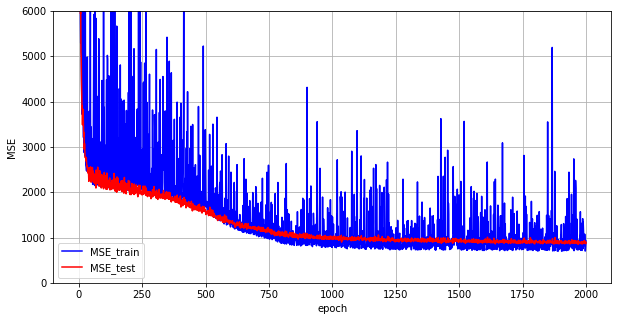

In [761]:
# plot loss and val_loss to choose the best epoch
loss_tr = mlpMonitor.history['loss']
loss_te = mlpMonitor.history['val_loss']

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(loss_tr)),loss_te,c='b')
ax.plot(range(len(loss_tr)),loss_tr,c='r')
ax.set_xlabel('epoch')
ax.set_ylabel('MSE')
ax.set_ylim(0,6000)
plt.legend(['MSE_train','MSE_test'],loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

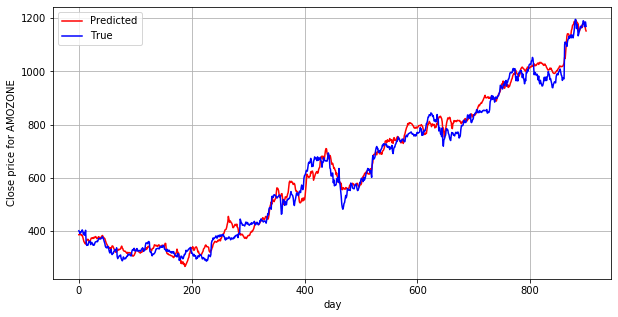

In [762]:
# plot the predicted Y and true Y on training set
Ypred = mlp.predict(Htrain)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(Ypred)),Ypred,c='r')
ax.plot(range(len(Ypred)),Ytrain,c='b')
ax.set_xlabel('day')
ax.set_ylabel('Close price for AMOZONE')
#ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
plt.legend(['Predicted','True'],loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

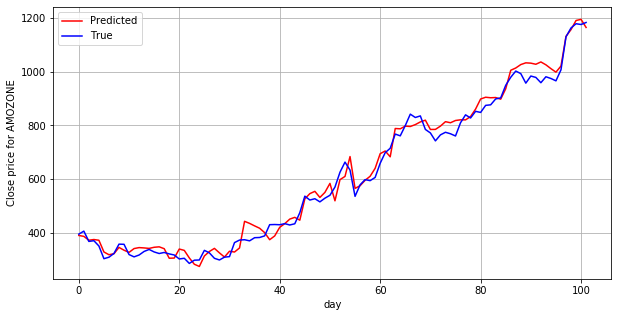

In [764]:
# plot the predicted Y and true Y on training set
Ypredt = mlp.predict(Htest)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.grid()
ax.plot(range(len(Ypredt)),Ypredt,c='r')
ax.plot(range(len(Ypredt)),Ytest,c='b')
ax.set_xlabel('day')
ax.set_ylabel('Close price for AMOZONE')
#ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1])
plt.legend(['Predicted','True'],loc='best')
plt.show

In [768]:
np.average(np.absolute((Ypred-Ytrain))/Ypred)

0.044144716

In [769]:
np.average(np.absolute((Ypredt-Ytest))/Ypredt)

0.046353266

<function matplotlib.pyplot.show(*args, **kw)>

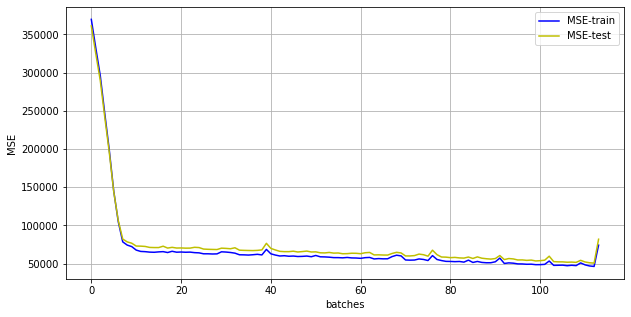

In [734]:
# plot the MSE by batch 
MSE_train = np.array(mlpMyMonitor1.MSEtrain)
MSE_test = np.array(mlpMyMonitor1.MSEtest)

fig=plt.figure(figsize=(10,5))
axb=fig.add_subplot(1,1,1)
axb.grid()
axb.plot(range(len(MSE_train)),MSE_train,c='b')
axb.plot(range(len(MSE_train)),MSE_test,c='y')
axb.set_xlabel('batches')
axb.set_ylabel('MSE')
plt.legend(['MSE-train','MSE-test'],loc='best')
plt.show